### Attribute Information:
   * ID: Customer ID
   * Age: Customer's age in completed years
   * Experience: #years of professional experience
   * Income: Annual income of the customer (000)
   * ZIP Code: Home Address ZIP
   * Family: Family size of the customer
   * CCAvg: Avg. spending on credit cards per month (000)
   * Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
   * Mortgage: Value of house mortgage if any. (000)
   * Personal Loan: Did this customer accept the personal loan offered in the last campaign?
   * Securities Account: Does the customer have a securities account with the bank?
   * CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
   * Online: Does the customer use internet banking facilities?
   * Credit card: Does the customer use a credit card issued by the bank?

### Steps and tasks:

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (**5** marks)

2. EDA: Study the data distribution in each attribute and target variable, share your findings (**20** marks)
   * Number of unique in each column?

   * Number of people with zero mortgage?

   * Number of people with zero credit card spending per month?

   * Value counts of all categorical columns.

   * Univariate and Bivariate

   * Get data model ready

3. Split the data into training and test set in the ratio of 70:30 respectively (**5** marks)

4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. 
   * Print all the metrics related to evaluating the model performance 
     * accuracy
     * recall
     * precision
     * f1score
     * roc_auc_score 
   * Draw a heatmap to display confusion matrix (**15** marks)

5. Find out 
   * coefficients of all the attributes and show the output in a data frame with column names
   * For test data show all the rows where the predicted class is not equal to the observed class. (**10** marks)

6. Give conclusion related to the Business understanding of your model? (**5** marks)

### Experiment 1 
   * Removed records with negative years of experience
   * Created Loans-By-Zipcode column from Zipcodes
   * Classification accuracy of 95%

## Step 1: Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [322]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#pd.options.display.float_format = '{:,.2f}'.format


In [67]:
# List .csv file
!ls *.csv

Bank_Personal_Loan_Modelling.csv


In [68]:
# Import dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [69]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [70]:
# Shape
df.shape

(5000, 14)

In [71]:
# Null values
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Insights:**
- Dataset has 5000 rows and 14 columns
- All data types are numeric. 
- All columns values except CCAvg column are integers.
- No null values

In [72]:
# Statistical Summary
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

**Insights:**
- Straight away, one thing jumps out, The minimum value for years of experience is negative. That does not make sense
- Let us find how many records have a negative number for years of experience

In [73]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof

**Insights:**
- The pandas profiling report flags Age and Experience as being highly correlated.
- Also Mortgage has a number of 0s, 69%

In [74]:
df.apply(lambda x: x < 0).sum()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

**Insights:**
- 52 records have negative years of experience
- Let us see if there is a pattern amongst all the records with negative years of experience.

In [75]:
df[ df['Experience'] < 0 ].describe()

ID        Age  Experience      Income      ZIP Code  \
count    52.000000  52.000000   52.000000   52.000000     52.000000   
mean   2427.346154  24.519231   -1.442308   69.942308  93240.961538   
std    1478.834118   1.475159    0.639039   37.955295   1611.654806   
min      90.000000  23.000000   -3.000000   12.000000  90065.000000   
25%     767.250000  24.000000   -2.000000   40.750000  92167.750000   
50%    2783.500000  24.000000   -1.000000   65.500000  93060.000000   
75%    3669.500000  25.000000   -1.000000   86.750000  94720.000000   
max    4958.000000  29.000000   -1.000000  150.000000  95842.000000   

          Family      CCAvg  Education    Mortgage  Personal Loan  \
count  52.000000  52.000000  52.000000   52.000000           52.0   
mean    2.865385   2.129423   2.076923   43.596154            0.0   
std     0.970725   1.750562   0.836570   90.027068            0.0   
min     1.000000   0.200000   1.000000    0.000000            0.0   
25%     2.000000   1.000000   1.000000    0.000000            0.0   
50%     3.000000   1.800000   2.000000    0.000000            0.0   
75%     4.000000   2.325000   3.000000    0.000000            0.0   
max     4.000000   7.200000   3.000000  314.000000            0.0   

       Securities Account  CD Account     Online  CreditCard  
count           52.000000        52.0  52.000000   52.000000  
mean             0.115385         0.0   0.576923    0.288462  
std              0.322603         0.0   0.498867    0.457467  
min              0.000000         0.0   0.000000    0.000000  
25%              0.000000         0.0   0.000000    0.000000  
50%              0.000000         0.0   1.000000    0.000000  
75%              0.000000         0.0   1.000000    1.000000  
max              1.000000         0.0   1.000000    1.000000

**Insights:**
- All records with Negative years of experience show an Age below 30 and none of them were offered a personal loan
- Confirm this with a count plot
- Mortgage, all 3 quartiles are 0, confirming a very large percentage of the records have 0 mortgage

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

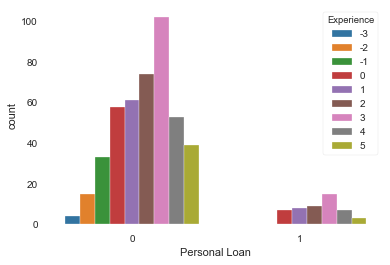

In [76]:
sns.countplot( 'Personal Loan' , data=df[(df['Age'] < 30)] , hue='Experience')

## Step 2. EDA: Study the data distribution in each attribute and target variable, share your findings (**20** marks)
   * Number of unique in each column?

   * Number of people with zero mortgage?

   * Number of people with zero credit card spending per month?

   * Value counts of all categorical columns.

   * Univariate and Bivariate

   * Get data model ready

#### Number of Unique in each column

In [77]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

**Insights:**
- ID appears to be a unique field, all records have a distinct ID
- 'Personal Loan' is the output categorical dependent variable to predict, which takes only 2 values (Boolean,0 or 1)
- 'Securities Account','CD Account','Online','CreditCard' are categorical variables with 2 values (Boolean, 0 or 1)
- 'Education' and 'Family' are categorical variables which are not Boolean.
- There are a large number of ZIP Codes. Even though it is a numerical number, assigning a numerical value to a person's location
does not make sense. Because of the large number of values, turning it into 1-hot encoded categorical variables does not seem feasible

#### Number of people with zero mortgage?

In [78]:
df[ df['Mortgage'] == 0 ]['ID'].count()

3462

In [79]:
# As a percentage
df[ df['Mortgage'] == 0 ]['ID'].count()/df.shape[0] * 100

69.24

#### Number of people with zero credit card spending per month?

In [80]:
df[ df['CCAvg'] == 0 ]['ID'].count()

106

In [81]:
# As a percentage
df[ df['CCAvg'] == 0 ]['ID'].count()/df.shape[0] * 100

2.12

#### Value counts of all categorical columns.

In [82]:
categorical_columns = ['Family','Education','Securities Account','CD Account','Online','CreditCard']

In [83]:
for col in categorical_columns:
    print("** Column = ", col)
    print(df[col].value_counts(normalize=True))
    print()

** Column =  Family
1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

** Column =  Education
1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

** Column =  Securities Account
0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

** Column =  CD Account
0    0.9396
1    0.0604
Name: CD Account, dtype: float64

** Column =  Online
1    0.5968
0    0.4032
Name: Online, dtype: float64

** Column =  CreditCard
0    0.706
1    0.294
Name: CreditCard, dtype: float64



In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Univariate plots

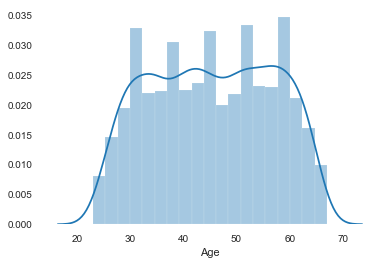

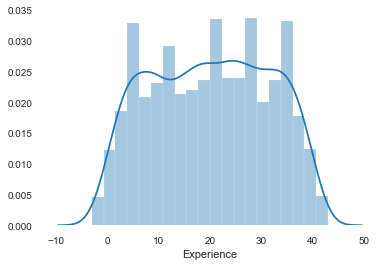

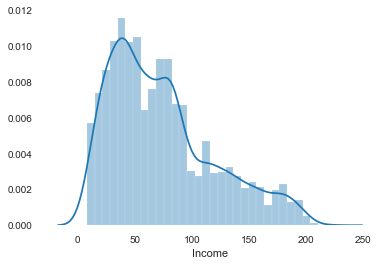

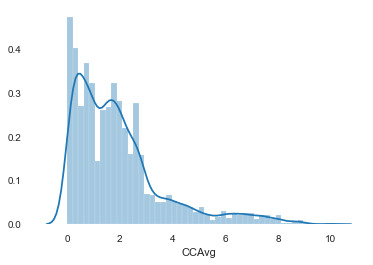

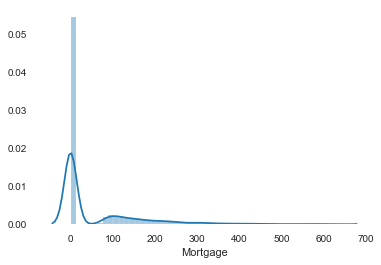

In [85]:
# Distplots of continuos independent variables 
for col in ['Age' , 'Experience', 'Income','CCAvg','Mortgage']:
    sns.distplot(df[col],kde=True)
    plt.show()

**Insights:**
- CCAvg is skewed to the left, Age and Experience seem to have similar distributions
- A majority of the records have a mortgage of 0, very highly skewed towards 0

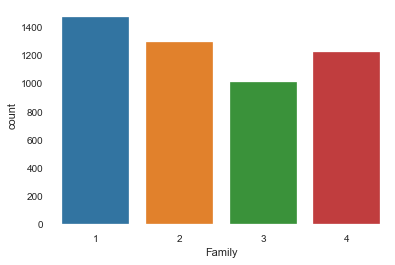

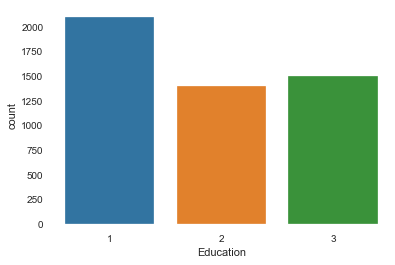

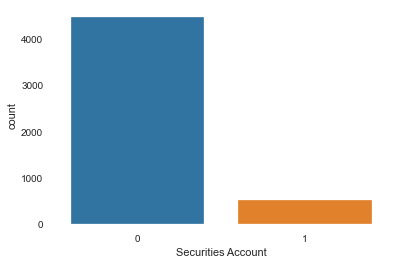

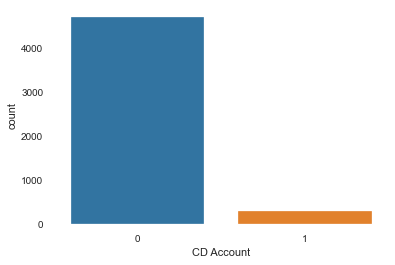

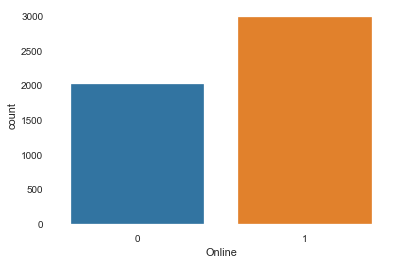

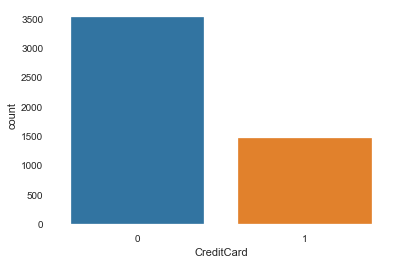

In [86]:
# Count plot of categorical independent variables 
for col in categorical_columns:
    sns.countplot(df[col])
    plt.show()

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

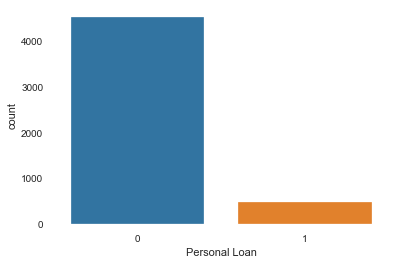

In [87]:
sns.countplot(df['Personal Loan'])

**Insights:**
- CD Account, Securities Account independent categorical variables are 0 most of the time, if we wanted to aggressively prune features they would be candidates to drop
- The output category of Personal Loan is also skewed to be mostly 0. 
- We haven't gone over sampling techniques to balance the dataset so I will leave this alone.

#### Bivariate plots

<AxesSubplot:>

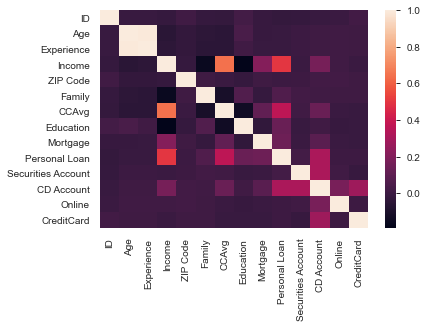

In [88]:
sns.heatmap(df.corr())

**Insights:**
- Age and Experience are highly correlated
- No obvious correlation between any of the other independent variables

<AxesSubplot:xlabel='Personal Loan', ylabel='Age'>

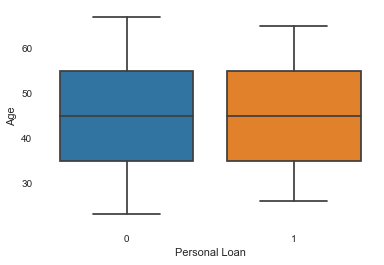

In [89]:
sns.boxplot(x='Personal Loan',y='Age',data=df)

<AxesSubplot:xlabel='Personal Loan', ylabel='CCAvg'>

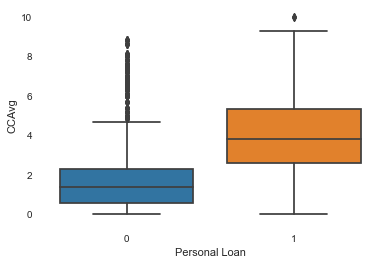

In [90]:
sns.boxplot(x='Personal Loan',y='CCAvg',data=df)

<AxesSubplot:xlabel='Personal Loan', ylabel='Income'>

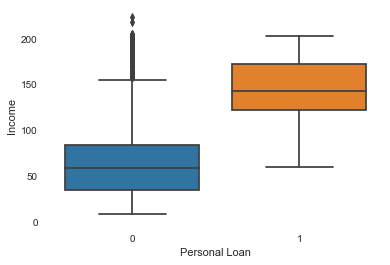

In [91]:
sns.boxplot(x='Personal Loan',y='Income',data=df)

<AxesSubplot:xlabel='Personal Loan', ylabel='Mortgage'>

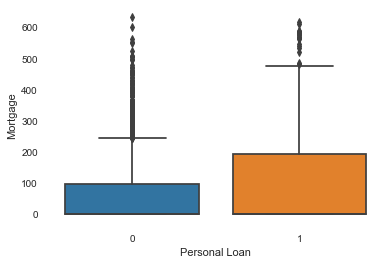

In [92]:
sns.boxplot(x='Personal Loan',y='Mortgage',data=df)

**Insights:**
- Among the independent variable that can take continuous values, a higher Income and CCAvg show greater acceptance of Personal Loan. 
- The large number of outliers in the mortgage plot makes it hard to conclusively state that a higher mortgage amount results in Personal Loan acceptance

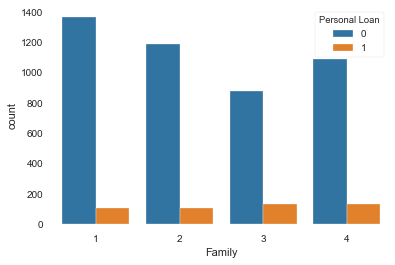

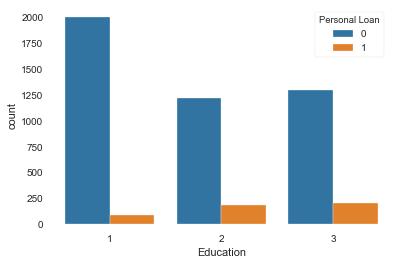

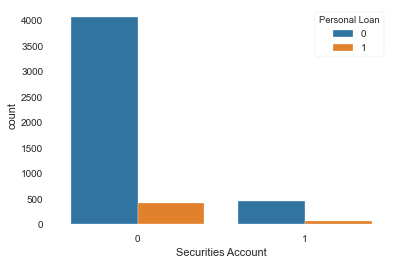

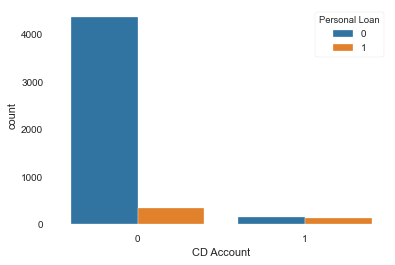

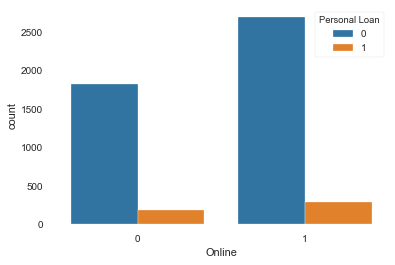

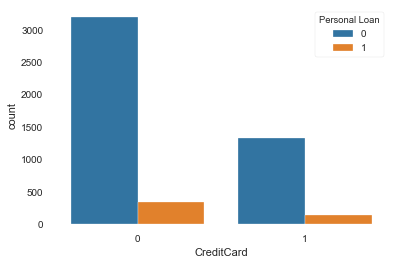

In [93]:
for col in categorical_columns:
    sns.countplot(x=col, data=df, hue='Personal Loan')  
    plt.show()

**Insights:**
- Looking at the proportion of people accepted whether they have these different accounts, we see that people who have a CD account, accept a Personal Loan almost 50% of the time
- For CD and Securities account the overall number of people having these accounts is small.
- For the others we can't definitively say that having anyone on of these accounts, markedly changes the outcome with respect to Personal Loan acceptance

#### Get data model ready

In [94]:
df.shape

(5000, 14)

In [95]:
num_records_with_negative_years_experience = df[ df['Experience'] < 0 ]['Personal Loan'].count()
num_records_with_negative_years_experience

52

In [96]:
df[ df['Experience'] < 0 ]['Personal Loan'].sum()

0

In [97]:
df['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

#### Observations
   * 52 records with negative years of experience have a Personal Loan outcome of 0
   * The data set is skewed towards a Personal Loan outcome of 0 (90%)
   
Based on the above we will drop the 52 records with negative years of experience

In [98]:
#Percentage of records dropped
print( "Records with -ve experience = {}%".format(num_records_with_negative_years_experience/df.shape[0] * 100))

Records with -ve experience = 1.04%


In [99]:
# Only keep records with years of experience >= 0
df_cleaned = df[ (df['Experience'] >= 0 ) ]

In [100]:
df_cleaned.describe()

ID          Age   Experience       Income      ZIP Code  \
count  4948.000000  4948.000000  4948.000000  4948.000000   4948.000000   
mean   2501.268795    45.557195    20.331043    73.814470  93151.573363   
std    1443.277676    11.320735    11.311973    46.112596   2126.669017   
min       1.000000    24.000000     0.000000     8.000000   9307.000000   
25%    1254.750000    36.000000    10.750000    39.000000  91911.000000   
50%    2497.500000    46.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  4948.000000  4948.000000  4948.000000  4948.000000    4948.000000   
mean      2.391471     1.935926     1.878941    56.634398       0.097009   
std       1.148444     1.747694     0.839745   101.828885       0.296000   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.600000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account   CD Account       Online   CreditCard  
count         4948.000000  4948.000000  4948.000000  4948.000000  
mean             0.104285     0.061035     0.597009     0.294058  
std              0.305660     0.239418     0.490549     0.455664  
min              0.000000     0.000000     0.000000     0.000000  
25%              0.000000     0.000000     0.000000     0.000000  
50%              0.000000     0.000000     1.000000     0.000000  
75%              0.000000     0.000000     1.000000     1.000000  
max              1.000000     1.000000     1.000000     1.000000

In [101]:
df_cleaned['Personal Loan'].value_counts(normalize=True)

0    0.902991
1    0.097009
Name: Personal Loan, dtype: float64

### One hot encode categorical variables
#### Even though CreditCart, Online,  CD Account, Securities Account are categorical variables, they already take on 0 or 1  (and so are already one hot encoded)
#### So only 1-hot encode Education

In [102]:
categorical_columns_one_hot = ['Education']

In [103]:
df_cat=pd.get_dummies(df_cleaned,columns=categorical_columns_one_hot)

In [104]:
df_cat.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Mortgage  \
0   1   25           1      49     91107       4    1.6         0   
1   2   45          19      34     90089       3    1.5         0   
2   3   39          15      11     94720       1    1.0         0   
3   4   35           9     100     94112       1    2.7         0   
4   5   35           8      45     91330       4    1.0         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Education_1  Education_2  Education_3  
0            1            0            0  
1            1            0            0  
2            1            0            0  
3            0            1            0  
4            0            1            0

### ZIP Code column
- Zip codes are numeric, but the values do not have any numeric interpretation

In [105]:
df_cat['ZIP Code'].nunique()

467

#### There are 467 unique values for the ZIP Code column, so we cannot one hot encode it

#### We will use the ZIP Code data along with Personal Loan, to compute how many Personal Loans were accepted in particular zip code.
#### This way we are using the information from the ZIP Code to create a new derived data column, called Loans-By-Zipcode

In [106]:
zipcode_to_personal_loans = df_cat.groupby('ZIP Code').sum()['Personal Loan']

In [107]:
zipcode_to_personal_loans[ df_cat['ZIP Code'] ]

ZIP Code
91107     3
90089     8
94720    19
94112     0
91330     3
         ..
92697     2
92037     5
93023     3
90034     1
92612     4
Name: Personal Loan, Length: 4948, dtype: int64

In [108]:
# Create a dictionary that maps Number of Loans to ZIP Code
map_dict = dict(zipcode_to_personal_loans )

In [109]:
# Create New colum Loans-By-Zipcode 
df_cat['Loans-By-Zipcode'] = df_cat['ZIP Code'].apply( lambda x : map_dict[x] )

<AxesSubplot:xlabel='Loans-By-Zipcode', ylabel='count'>

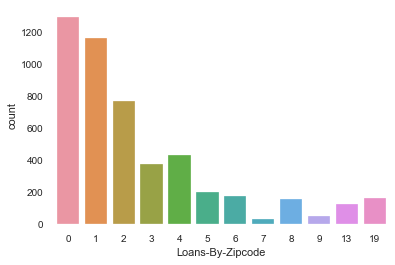

In [117]:
# Quick visualization of this newly created column
sns.countplot('Loans-By-Zipcode' ,data=df_cat)

**Insights:**
- Some zip codes have no Personal Loans offered at all, and the largest number of records belong to this category
- The largest number of loans offered to a certain zip code is 19

In [112]:
df_cat.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Mortgage  \
0   1   25           1      49     91107       4    1.6         0   
1   2   45          19      34     90089       3    1.5         0   
2   3   39          15      11     94720       1    1.0         0   
3   4   35           9     100     94112       1    2.7         0   
4   5   35           8      45     91330       4    1.0         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Education_1  Education_2  Education_3  Loans-By-Zipcode  
0            1            0            0                 3  
1            1            0            0                 8  
2            1            0            0                19  
3            0            1            0                 0  
4            0            1            0                 3

### Extract the y (dependent variable)

In [113]:
y = df_cat['Personal Loan']

### Now we can start dropping the columns we do not need

In [114]:
# Drop ID field, that is just a unique identifier for every record
# Drop ZIP Code field, now that we have extracted the information we need
# Drop Personal Loan (y dependent variable)
df_cat.drop(['ID','ZIP Code','Personal Loan'],inplace=True,axis='columns')

In [118]:
df_cat.head()

Age  Experience  Income  Family  CCAvg  Mortgage  Securities Account  \
0   25           1      49       4    1.6         0                   1   
1   45          19      34       3    1.5         0                   1   
2   39          15      11       1    1.0         0                   0   
3   35           9     100       1    2.7         0                   0   
4   35           8      45       4    1.0         0                   0   

   CD Account  Online  CreditCard  Education_1  Education_2  Education_3  \
0           0       0           0            1            0            0   
1           0       0           0            1            0            0   
2           0       0           0            1            0            0   
3           0       0           0            0            1            0   
4           0       0           1            0            1            0   

   Loans-By-Zipcode  
0                 3  
1                 8  
2                19  
3                 0  
4                 3

In [119]:
X = df_cat

**This completes the Data model preparation**

## Step 3. Split the data into training and test set in the ratio of 70:30 respectively (**5** marks)

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [121]:
y_train.value_counts(normalize=True)

0    0.904129
1    0.095871
Name: Personal Loan, dtype: float64

In [122]:
y_test.value_counts(normalize=True)

0    0.900337
1    0.099663
Name: Personal Loan, dtype: float64

**Insights:**
- y distribution for Training and Test data is verified to be the same

## Step 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. 
   * Print all the metrics related to evaluating the model performance 
     * accuracy
     * recall
     * precision
     * f1score
     * roc_auc_score 
   * Draw a heatmap to display confusion matrix (**15** marks)

In [164]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

In [287]:
model = LogisticRegression(random_state=5463)
model.fit(X_train, y_train)  

/Users/vsananda/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5463, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [288]:
# Predict
y_pred = model.predict(X_test)

In [295]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted)
    plt.figure(figsize=(15, 10))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Score and Confusion Matrix with default Threshold of 0.5

Training accuracy 0.958995090961594

Testing accuracy 0.9548821548821549

Confusion Matrix


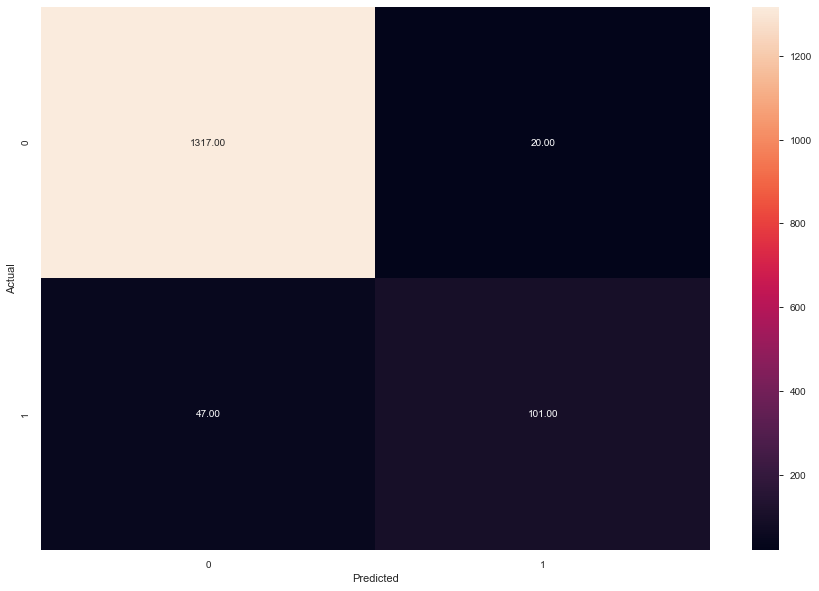


Recall: 0.6824324324324325

Precision: 0.8347107438016529

F1 Score: 0.7509293680297398

Roc Auc Score: 0.833736784653015


In [291]:
print("Training accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
draw_cm(y_test,y_pred)
print()
print("Recall:",recall_score(y_test,y_pred))
print()
print("Precision:",precision_score(y_test,y_pred))
print()
print("F1 Score:",f1_score(y_test,y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_pred))

In [292]:
# Null accuracy , choose 1 of the classes all the time
# Useful metric when we have an imbalance in class distribution
def compute_null_accuracy(y):
    distrib = y.value_counts(normalize=True)
    return distrib[ np.argmax(distrib) ] * 100

In [293]:
print( "Null accuracy = {}% ".format(compute_null_accuracy(y_test)))

Null accuracy = 90.03367003367003% 


#### Just choosing 0 all the time, will result in 90% accuracy, logistic regression gave an additional 5% increase to 95%

### AUC ROC Curve

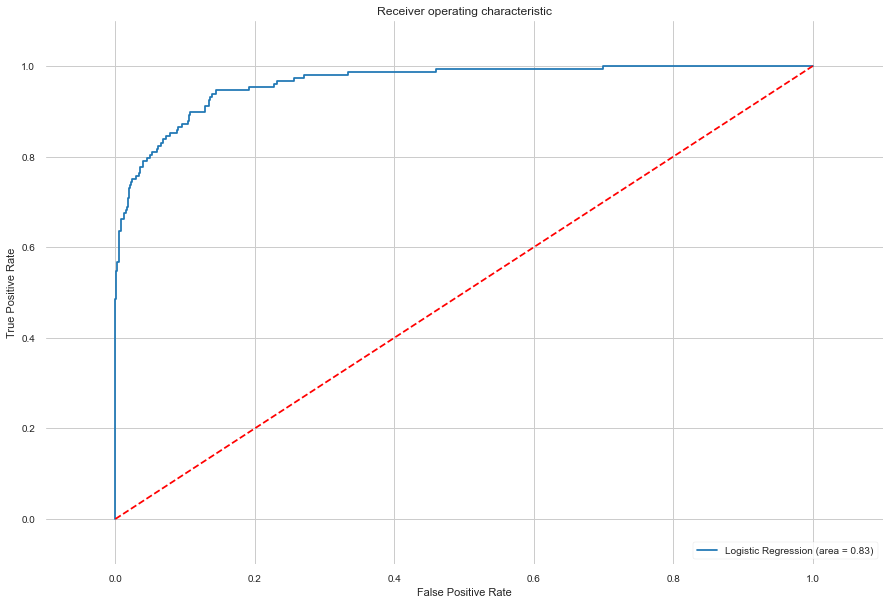

In [294]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15, 10))

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.grid('on')
plt.show()

**Insights:**
- Looking at the scores and the AUC ROC Curve, we see that with the default threshold of 0.5, the True Positive Rate or Recall is 0.68. 
- You can increase Recall or the TPR by decreasing the number of False Negatives.
- From the AUC ROC Curve we can see that the slope of the curve is high between 0.6 and 0.8, this means that for a small increase in the False Positive Rate, we will see a larger increase in the TPR (Recall score)
- Increasing the Recall score will result in the Precision Score decreasing 
- Precision score decreasing will mean the number of False Positives are increasing.
- From the confusion matrix we see that there are a lot more False Negatives (47) compared to False Positives (20), so there is some scope to make these more balanced without impacting the overall accuracy of 95%.
- We can do so by adjusting the threshold

## Fine Tuning Threshold
### We plot how the accuracy, precision and recall scores change as we vary the threshold


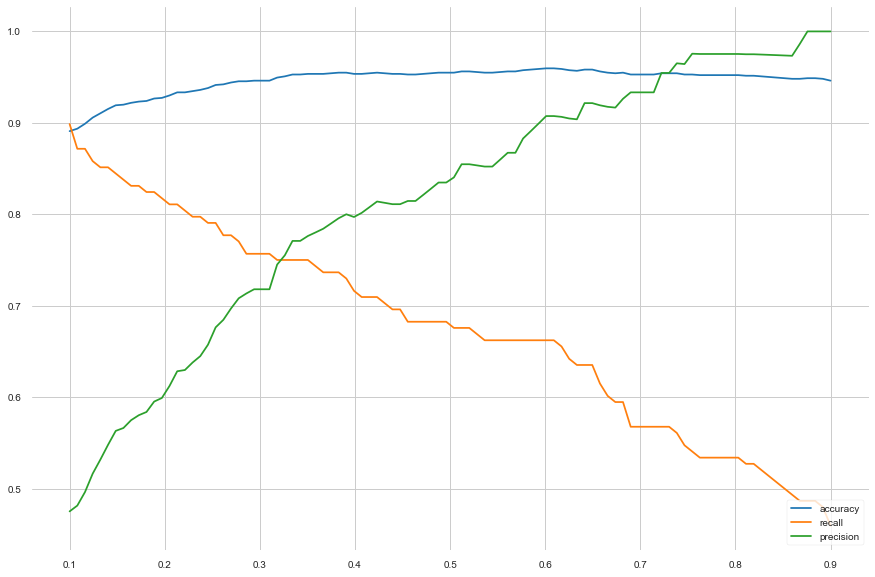

In [298]:
accuracy_plot=[]
recall_plot=[]
precision_plot=[]
x_range = np.linspace(0.1,0.9,100)

for threshold in x_range:
    y_pred = np.where(model.predict_proba(X_test)[:,1] > threshold ,1, 0)
    accuracy_plot.append( accuracy_score(y_test,y_pred))
    recall_plot.append( recall_score(y_test,y_pred))
    precision_plot.append( precision_score(y_test,y_pred))

plt.figure(figsize=(15, 10))
plt.plot(x_range, accuracy_plot,label="accuracy")
plt.plot(x_range, recall_plot,label='recall')
plt.plot(x_range, precision_plot,label='precision')
plt.legend(loc="lower right")
plt.grid('on')
plt.show()

## From the graph a threshold value that balances the precision and recall score seems to be around 0.325

In [308]:
Threshold = 0.325
y_pred = np.where(model.predict_proba(X_test)[:,1] > Threshold ,1, 0)

Testing accuracy 0.9501683501683502

Confusion Matrix


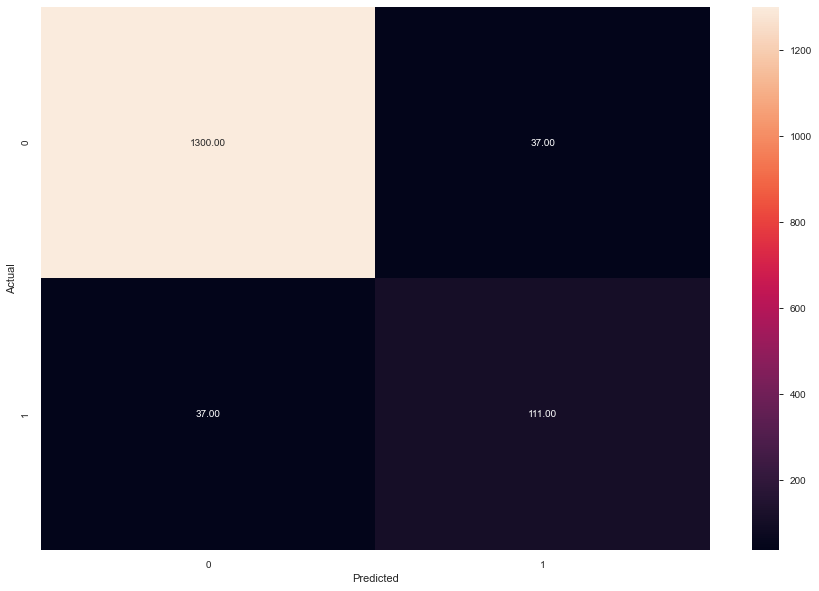


Recall: 0.75

Precision: 0.75

F1 Score: 0.75

Roc Auc Score: 0.8611630516080777


In [309]:
print("Testing accuracy",accuracy_score(y_test, y_pred))
print()
print('Confusion Matrix')
draw_cm(y_test,y_pred)
print()
print("Recall:",recall_score(y_test,y_pred))
print()
print("Precision:",precision_score(y_test,y_pred))
print()
print("F1 Score:",f1_score(y_test,y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_pred))

### By setting the threshold to 0.325, we have balanced the number of False Negatives and False Positives at 37 each
### The overall accuracy remains at 95%


## Step 5. Find out 
   * coefficients of all the attributes and show the output in a data frame with column names
   * For test data show all the rows where the predicted class is not equal to the observed class. (**10** marks)

In [313]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

Col  Coeff
7           CD Account   3.19
10         Education_1   3.07
6   Securities Account   0.90
9           CreditCard   0.89
12         Education_3   0.85
8               Online   0.65
11         Education_2   0.60
3               Family   0.59
1           Experience   0.32
0                  Age   0.31
4                CCAvg   0.15
2               Income   0.06
13    Loans-By-Zipcode   0.03
5             Mortgage   0.00

In [317]:
# Observe the predicted and observed classes in a dataframe.
z = X_test.copy()
z['Actual-Output'] = y_test
z['Predicted-Output'] = y_pred

In [318]:
filter_actual_not_equal_predicted = ( z['Actual-Output'] != z['Predicted-Output'])

In [321]:
z[filter_actual_not_equal_predicted]

Age  Experience  Income  Family  CCAvg  Mortgage  Securities Account  \
2536   51          25     104       1   4.20         0                   0   
4179   29           3      91       1   3.40         0                   0   
1552   29           5     195       1   4.30         0                   0   
2558   43          19     172       2   6.67         0                   0   
4993   45          21     218       2   6.67         0                   0   
...   ...         ...     ...     ...    ...       ...                 ...   
4151   44          18     123       3   5.90         0                   0   
3605   61          31     130       2   2.60         0                   0   
2533   54          29     111       1   1.10         0                   0   
2305   32           7     185       2   6.70         0                   0   
4981   34           9     195       2   3.00       122                   0   

      CD Account  Online  CreditCard  Education_1  Education_2  Education_3  \
2536           0       1           0            0            1            0   
4179           0       0           0            0            0            1   
1552           0       0           0            1            0            0   
2558           0       1           0            1            0            0   
4993           0       1           0            1            0            0   
...          ...     ...         ...          ...          ...          ...   
4151           1       1           1            1            0            0   
3605           0       0           0            0            0            1   
2533           0       1           0            0            1            0   
2305           1       1           1            1            0            0   
4981           0       1           0            1            0            0   

      Loans-By-Zipcode  Actual-Output  Predicted-Output  
2536                 1              1                 0  
4179                 2              1                 0  
1552                 2              0                 1  
2558                 2              0                 1  
4993                 0              0                 1  
...                ...            ...               ...  
4151                 1              1                 0  
3605                 2              1                 0  
2533                 3              1                 0  
2305                 1              0                 1  
4981                 0              0                 1  

[74 rows x 16 columns]

## Step 6. Give conclusion related to the Business understanding of your model? (**5** marks)

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that the customer will accept Personal Loan, and the Customer did accept.

*False Positive (observed=0,predicted=1):*

Predicted that the customer will accept Personal Loan, but the Customer did **not** accept.

*True Negative (observed=0,predicted=0):*

Predicted that the customer will not accept Personal Loan, and the Customer did not accept.

*False Negative (observed=1,predicted=0):*

Predicted that the customer will not accept Personal Loan, and the Customer did accept.


##### `Important Features`

"CDAccount", "Education", "Securities Account", "Online", "Family", "Credit Card"

seems to be top 56 features which influence the model's output. Based on the coefficients value.


##### `Important Metric`

False Negatives represent **Business Opportunities lost**, i,e the customer would have taken the Personal Loan if they were offered it.

False Positives represent **waste of Marketing dollars**, we offered the Personal Loan but the customer did not take it.

I would bias the model towards a lower number of False Negatives, because we can assume that the bank would make far **more profit by having customers accept a Personal Loan**, than the incremental marketing cost.
Lower False Negatives means **Recall is the important metric**. We want to increase Recall without impacting accuracy.

Moving the threshold from 0.5 to 0.325 accomplishes that while maintaining the same accuracy of the model at 95%

I tried thresholds lower of 0.3, but this decreases the accuracy of the model to below 95%.